## Import Libraries

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px

## Reading the data

In [17]:
housing_data = pd.read_csv("housing_price_dataset.csv")
housing_data.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065


In [19]:
display(housing_data.head())

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065


## EDA

In [20]:
display(housing_data.isnull().sum())

SquareFeet      0
Bedrooms        0
Bathrooms       0
Neighborhood    0
YearBuilt       0
Price           0
dtype: int64

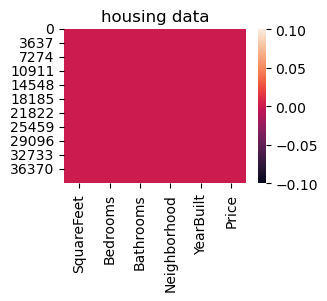

In [22]:
plt.figure(figsize = (10, 2))

plt.subplot(1, 3, 1)
plt.title("housing data")
sns.heatmap(train.isnull())

plt.show()

<Axes: >

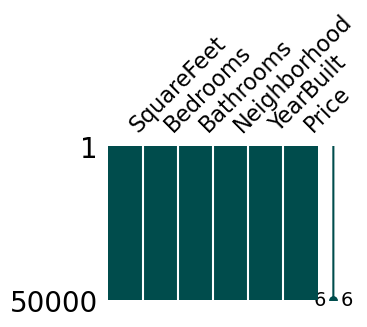

In [23]:
msno.matrix(df=housing_data, figsize=(3,2), color=(0,.3,.3))

In [24]:
display(housing_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SquareFeet    50000 non-null  int64  
 1   Bedrooms      50000 non-null  int64  
 2   Bathrooms     50000 non-null  int64  
 3   Neighborhood  50000 non-null  object 
 4   YearBuilt     50000 non-null  int64  
 5   Price         50000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 2.3+ MB


None

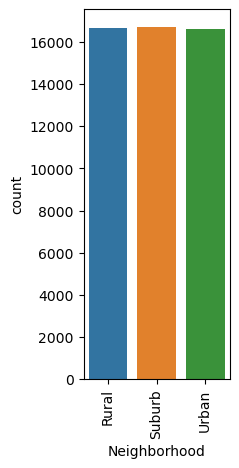

In [25]:
plt.subplot(1, 3, 1)
sns.countplot(x = housing_data["Neighborhood"])
plt.xticks(rotation = 90);

In [26]:
housing_data["Neighborhood"] = housing_data["Neighborhood"].replace({'Rural':1,'Urban':2,'Suburb':3})

In [27]:
display(housing_data)

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,1,1969,215355.283618
1,2459,3,2,1,1980,195014.221626
2,1860,2,1,3,1970,306891.012076
3,2294,2,1,2,1996,206786.787153
4,2130,5,2,3,2001,272436.239065
...,...,...,...,...,...,...
49995,1282,5,3,1,1975,100080.865895
49996,2854,2,2,3,1988,374507.656727
49997,2979,5,3,3,1962,384110.555590
49998,2596,5,2,1,1984,380512.685957


In [30]:
help(housing_data._append)

Help on method _append in module pandas.core.frame:

_append(other, ignore_index: 'bool' = False, verify_integrity: 'bool' = False, sort: 'bool' = False) -> 'DataFrame' method of pandas.core.frame.DataFrame instance



In [31]:
train_feature = housing_data.columns.drop('Price').tolist()
train_feature

['SquareFeet', 'Bedrooms', 'Bathrooms', 'Neighborhood', 'YearBuilt']

In [37]:
housing_data[train_feature].describe().T\
        .style.bar(subset=['mean'], color=px.colors.qualitative.G10[0])\
        .background_gradient(subset=['std'], cmap='BuPu')\
        .background_gradient(subset=['50%'], cmap='Reds')

,count,mean,std,min,25%,50%,75%,max
SquareFeet,50000.000000,2006.374680,575.513241,1000.000000,1513.000000,2007.000000,2506.000000,2999.000000
Bedrooms,50000.000000,3.498700,1.116326,2.000000,3.000000,3.000000,4.000000,5.000000
Bathrooms,50000.000000,1.995420,0.815851,1.000000,1.000000,2.000000,3.000000,3.000000
Neighborhood,50000.000000,2.000900,0.817284,1.000000,1.000000,2.000000,3.000000,3.000000
YearBuilt,50000.000000,1985.404420,20.719377,1950.000000,1967.000000,1985.000000,2003.000000,2021.000000


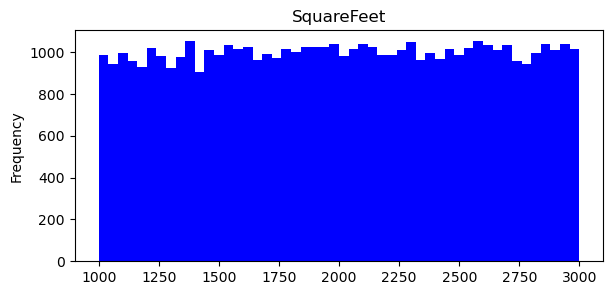

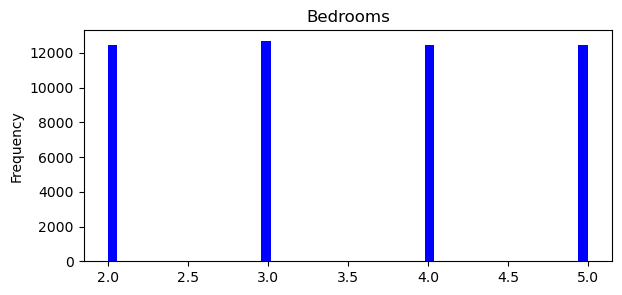

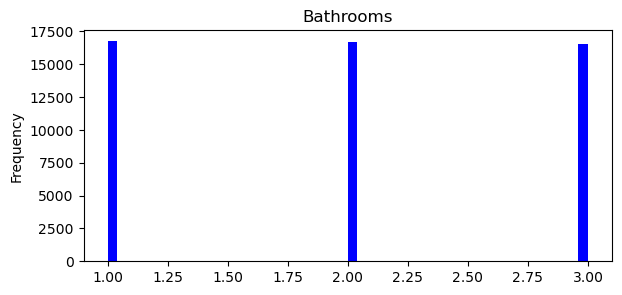

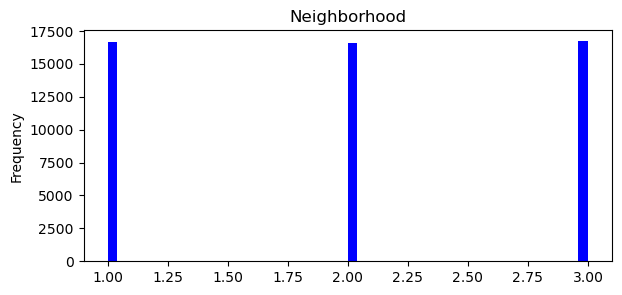

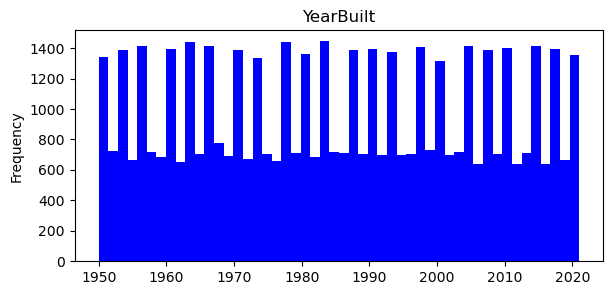

In [42]:
for feat in train_feature:
    plt.figure(figsize=(15,3))
    ax1 = plt.subplot(1,2,1)
    housing_data[feat].plot(kind='hist', bins=50, color='blue')
    plt.title(feat)
    plt.show()

In [47]:
# Calculate skewness and kurtosis for each column
skewness = housing_data.skew()
kurtosis = housing_data.kurt()

# Printing the results
for column in housing_data.columns[:-1]:
    print(f"Column: {column}")
    print(f"Skewness: {skewness[column]}")
    print(f"Kurtosis: {kurtosis[column]}\n")

Column: SquareFeet
Skewness: -0.011161817099369262
Kurtosis: -1.189925973482508

Column: Bedrooms
Skewness: 0.004640350313677791
Kurtosis: -1.356056808946854

Column: Bathrooms
Skewness: 0.008407664728520576
Kurtosis: -1.497576657664007

Column: Neighborhood
Skewness: -0.001655027801734351
Kurtosis: -1.502886180102843

Column: YearBuilt
Skewness: 0.00555654660638406
Kurtosis: -1.1968387057465915



In [48]:
#Split the dataset into train and test
train = pd.DataFrame(housing_data).head(40000)
test = pd.DataFrame(housing_data).tail(10000)
test =  test.reset_index(drop=True)
display(train.describe())
display(test.describe())

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
count,40000.000000,40000.000000,40000.00000,40000.000000,40000.000000,40000.000000
mean,2008.862325,3.500150,1.99340,2.000075,1985.432125,225025.122634
std,575.082009,1.115496,0.81647,0.816696,20.701102,76056.770365
min,1000.000000,2.000000,1.00000,1.000000,1950.000000,-36588.165397
25%,1516.750000,3.000000,1.00000,1.000000,1968.000000,170327.631505
50%,2012.000000,3.000000,2.00000,2.000000,1985.000000,225038.726320
75%,2507.000000,4.000000,3.00000,3.000000,2003.000000,279479.899331
max,2999.000000,5.000000,3.00000,3.000000,2021.000000,492195.259972


,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
count,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1996.424100,3.492900,2.00350,2.004200,1985.293600,224036.135220
std,577.156548,1.119676,0.81336,0.819664,20.792985,76479.887053
min,1000.000000,2.000000,1.00000,1.000000,1950.000000,154.779120
25%,1498.750000,2.000000,1.00000,1.000000,1967.000000,168068.663346
50%,1989.000000,3.000000,2.00000,2.000000,1985.000000,225127.998713
75%,2499.000000,5.000000,3.00000,3.000000,2003.000000,278980.764718
max,2999.000000,5.000000,3.00000,3.000000,2021.000000,482577.163405


## Feature Selection